# **Skyrim Social Network Analysis**
**Description:** Skyrim is a country in a fictional world. Which appears in the game Elder Scrolls V: Skyrim.

**Dataset source:** The dataset was created by me using the Unofficial Elder Scrolls Pages as a resource.

**Network dimensions:** 1027 Nodes and 2808 Edges

**Credit to the Elder Scrolls Pages:** *https://en.uesp.net/wiki/Skyrim:People*

We need to import the libraries we will use in order to start.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json

We can create the network by creating nodes for every character, then creating edges for every acquaintance they have.

In [12]:
G = nx.Graph()
with open("Characters.json", "r") as file:
    links_data = json.load(file)
for link_data in links_data:
    name = link_data.get("name")
    acquaintances = link_data.get("acquaintances")
    G.add_node(name)
    for i in range(len(acquaintances)):
        G.add_edge(name, acquaintances[i])


We can visualize our network by turning it into a graph.

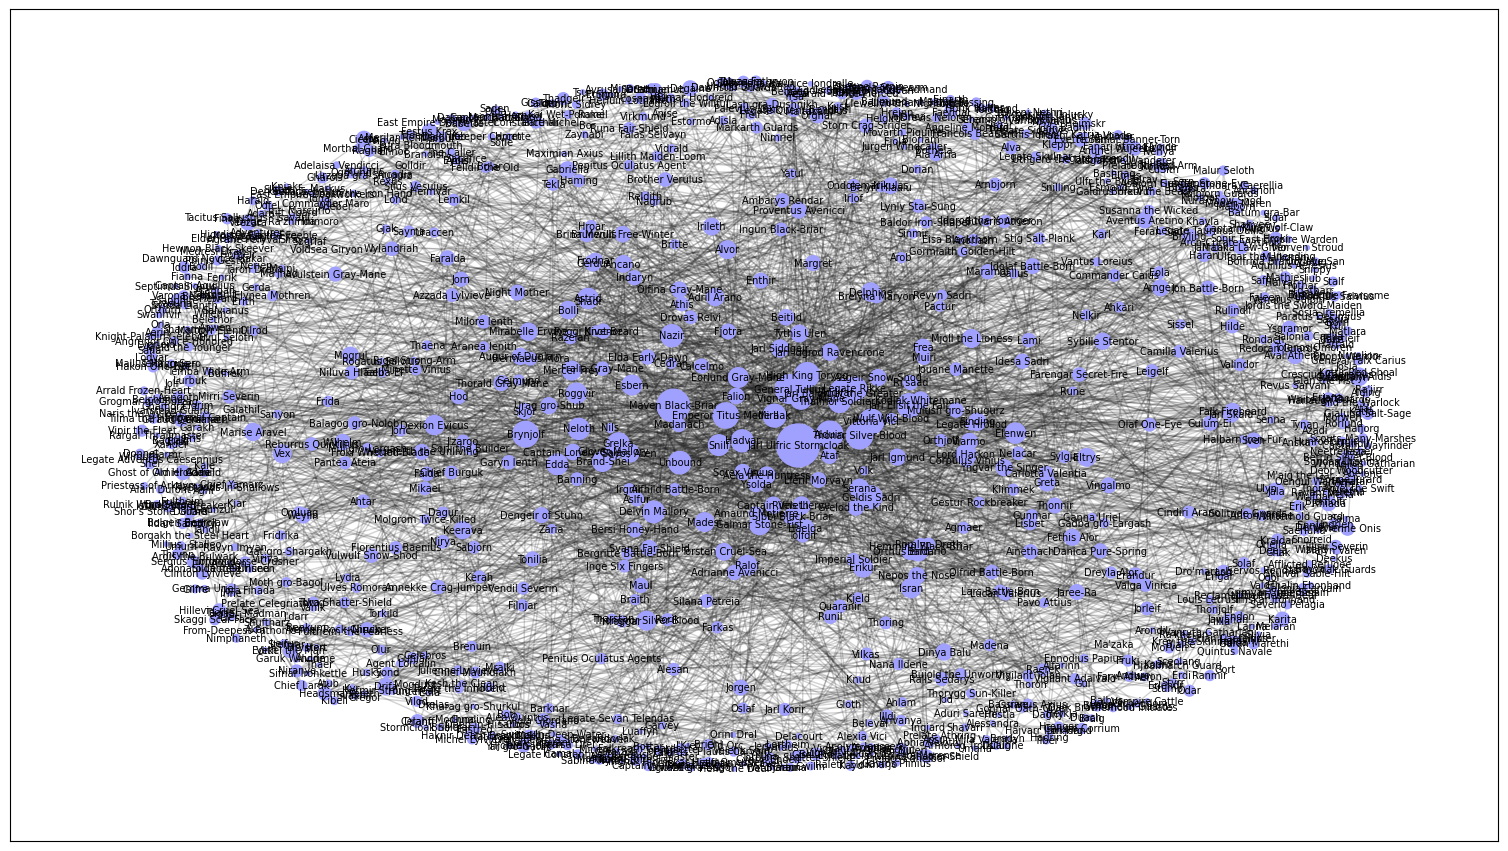

In [4]:
pos = nx.spring_layout(G, k = 0.7, seed= 1911)
node_sizes = [10 * G.degree[node] for node in G.nodes]
plt.figure(figsize=(19.20, 10.80))
nx.draw_networkx_nodes(G, pos, node_color="#A0A0FF", node_size=node_sizes)
nx.draw_networkx_edges(G, pos, edge_color="#202020", alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size= 7)
plt.show()

We can create another graph to see the distribution of the degrees of our nodes. Doing so shows us that this graph follows the Power-Law distribution.

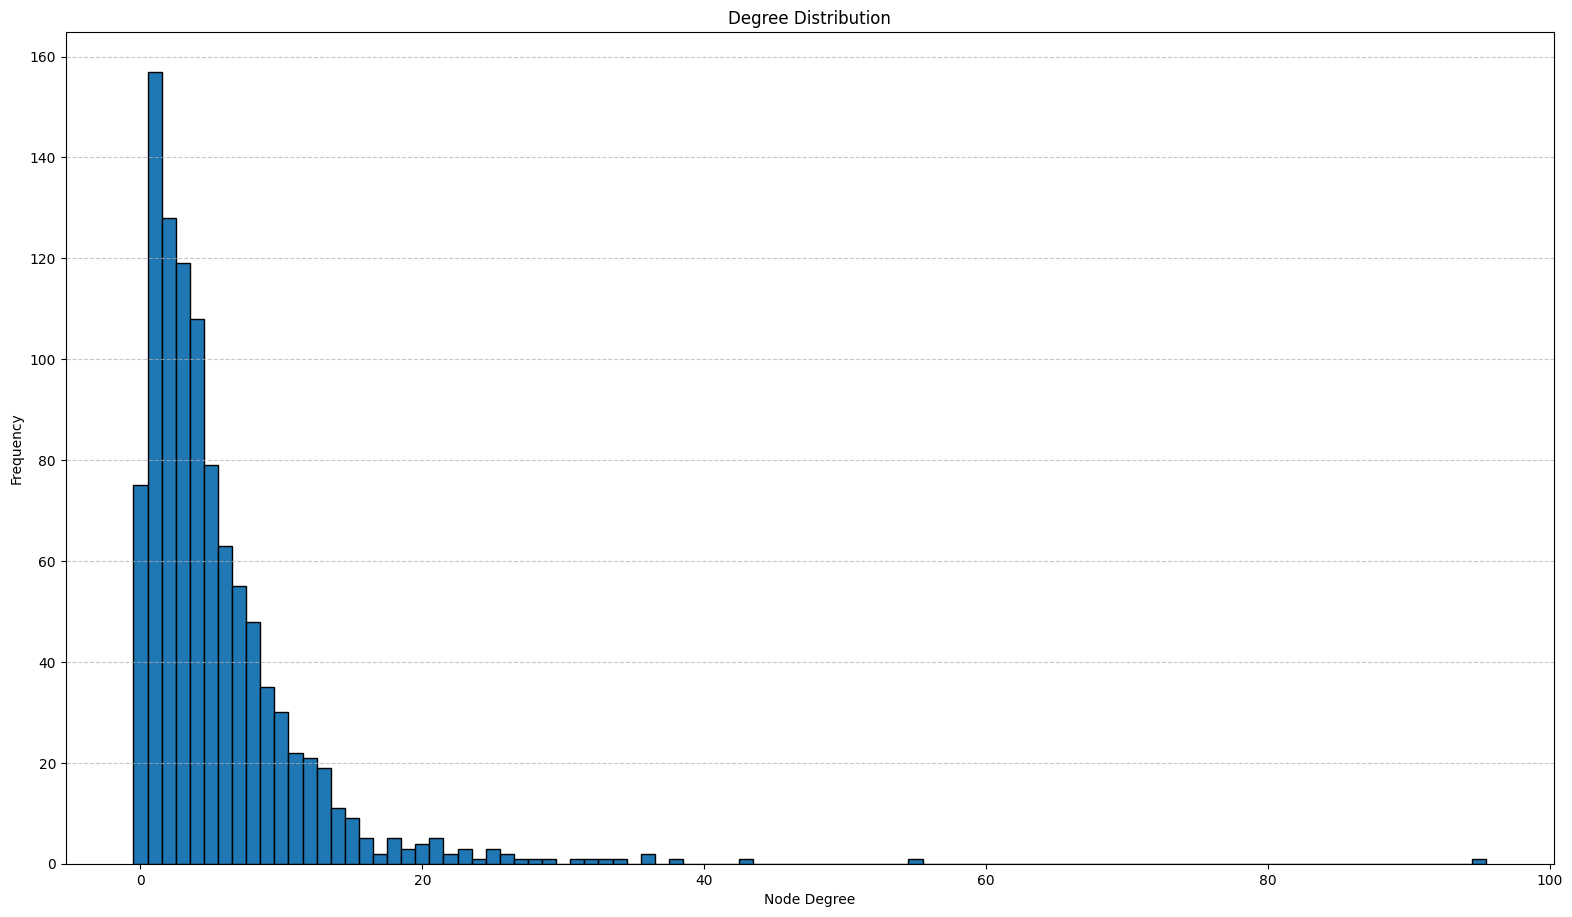

In [6]:
degrees = dict(G.degree())
plt.figure(figsize=(19.20, 10.80))
plt.hist(degrees.values(), bins=range(min(degrees.values()), max(degrees.values()) + 2, 1), align='left', histtype= "barstacked", edgecolor='black')
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')
plt.show()

We can analyze our graph by calculating some of it's attributes.

In [13]:
mostPopulars = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]
betweenness_centrality = nx.betweenness_centrality(G)
max_betweenness_centrality_node = max(betweenness_centrality, key=betweenness_centrality.get)
average_clustering_coefficient = nx.average_clustering(G)
number_of_edges = G.number_of_edges()
number_of_nodes = G.number_of_nodes()
edge_density = (2 * number_of_edges) / (number_of_nodes * (number_of_nodes - 1))

print("Most Popular 5 people and their degrees: "+ ", ".join(map(str, mostPopulars)))
print("Number of edges: " + str(number_of_edges))
print("Number of nodes: " + str(number_of_nodes))
print("Maximum Betweenness Centrality: " + str(max_betweenness_centrality_node))
print("Average clustering coefficient: " + str(average_clustering_coefficient))
print("Edge Density: " + str(edge_density))

Most Popular 5 people and their degrees: ('Jarl Ulfric Stormcloak', 95), ('Maven Black-Briar', 55), ('General Tullius', 43), ('Jarl Balgruuf the Greater', 38), ('Thonar Silver-Blood', 36)
Number of edges: 2808
Number of nodes: 1027
Maximum Betweenness Centrality: Jarl Ulfric Stormcloak
Average clustering coefficient: 0.38756719768068837
Edge Density: 0.005329780146568954


We can calculate the similarity of nodes. As the nodes don't have attributes I've used Jaccard similarity.

In [10]:
node1 = "Jarl Balgruuf the Greater"
node2 = "Jarl Igmund"
neighbors_node1 = set(G.neighbors(node1))
neighbors_node2 = set(G.neighbors(node2))

intersection_size = len(neighbors_node1.intersection(neighbors_node2))
union_size = len(neighbors_node1.union(neighbors_node2))

if union_size == 0:
    print("There is no similarity between the two nodes")
else:
    print("The Jaccard between " + str(node1) + " and " + str(node2) + " is: "+ str(intersection_size / union_size))

The Jaccard between Jarl Balgruuf the Greater and Jarl Igmund is: 0.0851063829787234


We can calculate node specific attributes as well.

In [32]:
closeness_centrality = nx.closeness_centrality(G)[node1]
print("Closeness Centrality: " + str(closeness_centrality))
degree_centrality_node = nx.degree_centrality(G)[node1]
print("Degree Centrality: " + str(degree_centrality_node))


Closeness Centrality: 0.27280369402214044
Degree Centrality: 0.037037037037037035


Small world Coefficient and Average Shortest Path of our graph shows us how connected our network is.

In [11]:
if not nx.is_connected(G):
    print("Graph is not connected. Calculating for the largest connected component.")
    largest_component = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_component)

clustering_coefficient = nx.average_clustering(G)
average_shortest_path = nx.average_shortest_path_length(G)

random_graph = nx.random_reference(G, niter=3, connectivity=True)
random_clustering_coefficient = nx.average_clustering(random_graph)
random_average_shortest_path = nx.average_shortest_path_length(random_graph)

omega = (random_clustering_coefficient / clustering_coefficient) / (random_average_shortest_path / average_shortest_path)
print("Average Shortest Path: " + str(average_shortest_path))
print(f"Small-world coefficient: {omega}")

Graph is not connected. Calculating for the largest connected component.
Average Shortest Path: 4.542885864317554
Small-world coefficient: 0.07794376147148481
